In [1]:
import os
import sys
import base64
import matplotlib.pyplot as plt
import numpy as np
from urllib import parse
import pandas as pd

current_directory = os.getcwd()
root_directory = os.path.abspath(os.path.join(current_directory, '..', '..')) 
if root_directory not in sys.path:
    sys.path.append(root_directory)

import logging
logging.basicConfig(level=logging.CRITICAL)

from code_utils.elastic import get_from_es

In [2]:
body = {
  "size": 0,
  "track_total_hits": True,
  "query": {
    "bool": {
      "filter": {
        "term": {
          "externalIds.type.keyword": "doi"
        }
      }
    }
  },
  "aggs": {
    "predicted_labels": {
      "terms": {
        "field": "predict_teds.label.keyword",
        "size": 10000000
      }
    }
  }
}

data=get_from_es(body,'scanR2')

In [5]:
26062*100/193099

13.49670376335455

In [4]:
114543*100/193099

59.318277153170136

In [6]:
46963*100/193099

24.320685244356522

In [3]:
data

{'took': 3,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 2714832, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'predicted_labels': {'doc_count_error_upper_bound': 0,
   'sum_other_doc_count': 0,
   'buckets': [{'key': 'not_ipcc', 'doc_count': 2521733},
    {'key': 'not_ipbes', 'doc_count': 2509153},
    {'key': 'ipbes', 'doc_count': 205679},
    {'key': 'ipcc', 'doc_count': 193099},
    {'key': 'ipcc_adaptation', 'doc_count': 114543},
    {'key': 'ipcc_mitigation', 'doc_count': 46963},
    {'key': 'ipcc_science', 'doc_count': 26062}]}}}

In [ ]:
data 

{'took': 3957,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 2791265, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'predicted_labels': {'doc_count_error_upper_bound': 0,
   'sum_other_doc_count': 0,
   'buckets': [{'key': 'not_ipcc', 'doc_count': 2747281},
    {'key': 'ipcc', 'doc_count': 43984},
    {'key': 'ipcc_adaptation', 'doc_count': 22288},
    {'key': 'ipcc_science', 'doc_count': 9909},
    {'key': 'ipcc_mitigation', 'doc_count': 8775}]}}}

In [8]:
193099*100/2714832

7.1127421512638715

C:\Users\haallat\AppData\Local\Temp\ipykernel_7244\1548127622.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{tick:.1f}%' for tick in ax.get_yticks()], fontsize=40)


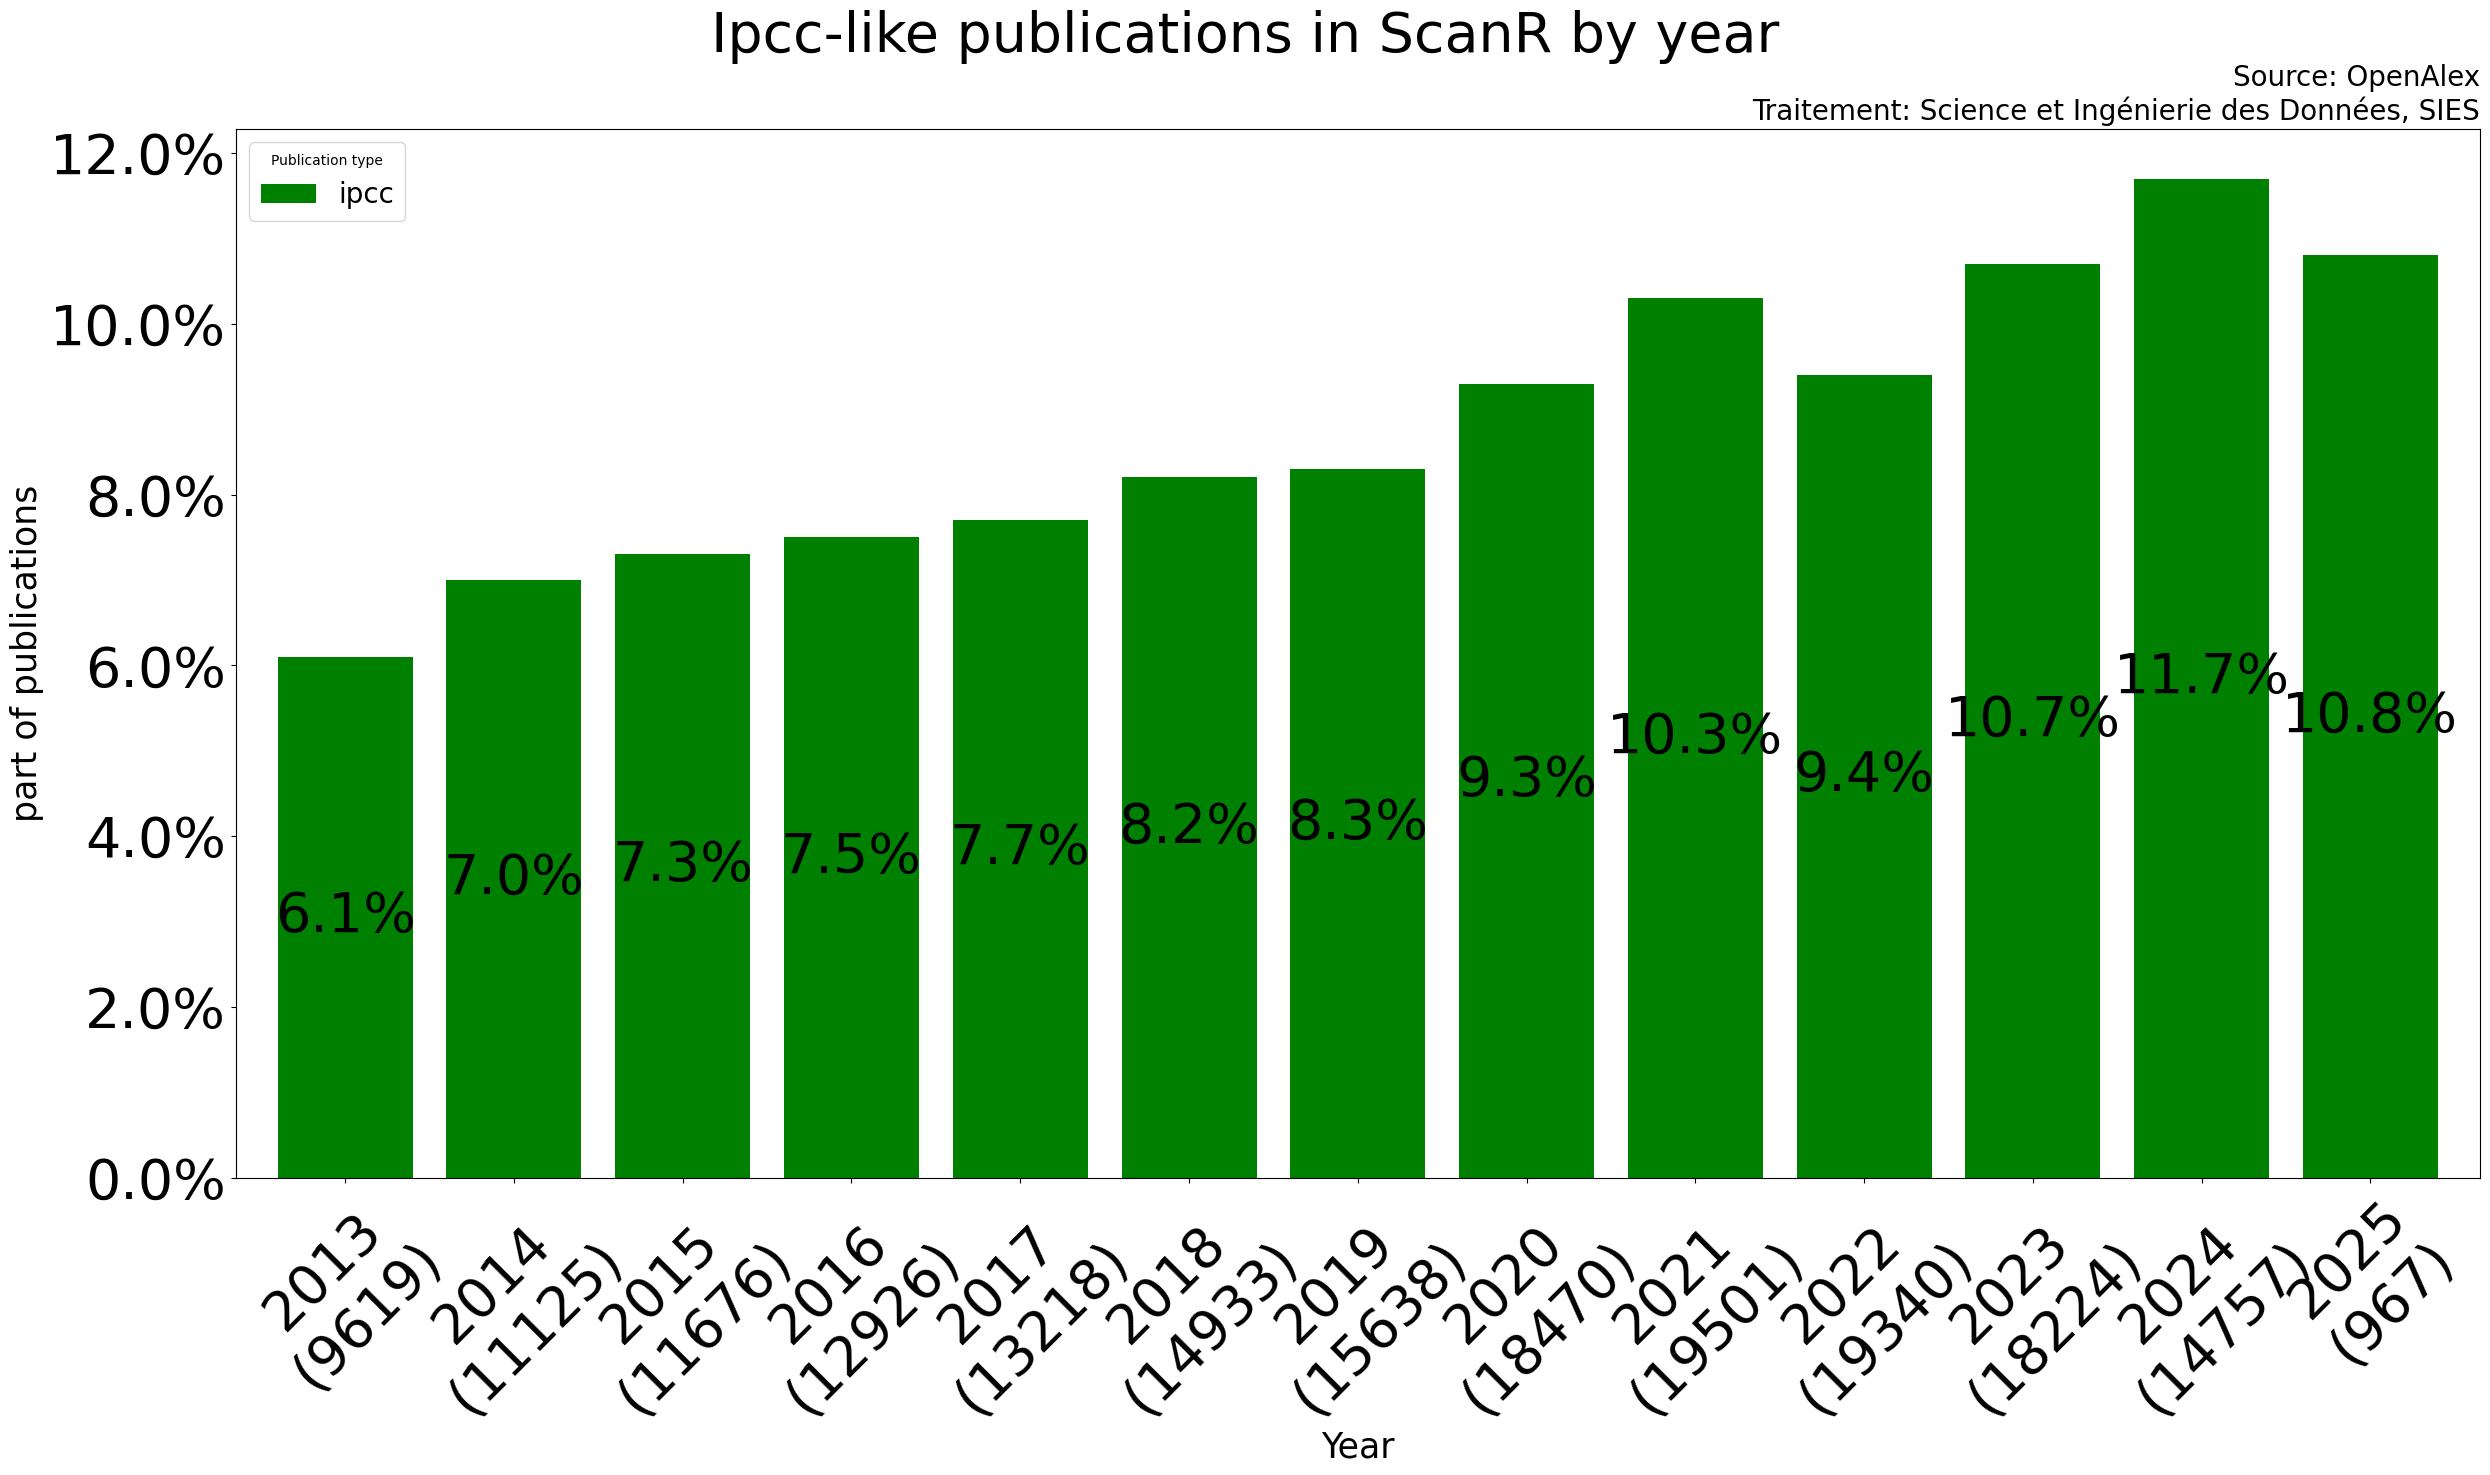

In [7]:
body = {
  "size": 0,
  "track_total_hits": True,
  "query": {
    "bool": {
      "filter": {
        "term": {
          "externalIds.type.keyword": "doi"
        }
      }
    }
  },
  "aggs": {
    "years": {
      "terms": {
        "field": "year",
        "size": 10000000
      },
      "aggs": {
        "predicted_labels": {
          "terms": {
            "field": "predict_teds.label.keyword",
            "size": 10000000
          }
        }
      }
    }
  }
}
data=get_from_es(body,'scanR2')
data_counts={}
for x in data['aggregations']['years']['buckets']:
    if x['doc_count']>=500 and x['key']>=2013:
      #data_counts[x['key']]=[]
      if 'ipcc' in [bucket['key'] for bucket in x['predicted_labels']['buckets']]:
          nb=[bucket['doc_count'] for bucket in x['predicted_labels']['buckets'] if bucket['key']=='ipcc'][0]
          data_counts[x['key']]=[round(nb*100/x['doc_count'],1),int(nb)]
      else:
          data_counts[x['key']]=[0,0]
data_counts={key: value for key, value in data_counts.items() if value!= [0]}


df = pd.DataFrame.from_dict(data_counts, orient='index', columns=['ipcc','nb'])
df = df.sort_index()

ax = df['ipcc'].plot(kind='bar', figsize=(25, 15), width=0.8, color='green')

for i, (index, row) in enumerate(df.head(20).iterrows()): 
    ax.text(i, row['ipcc'] / 2, f'{row["ipcc"]}%', ha='center', va='center', color='black', size=40)

ax.set_xlabel('Year', fontsize=25)
x_labels = [f"{index}\n({int(row['nb'])})" for index, row in df.iterrows()]
ax.set_xticklabels(x_labels, rotation=45, fontsize=40)
ax.set_ylabel(f'part of publications', fontsize=25)
ax.set_yticklabels([f'{tick:.1f}%' for tick in ax.get_yticks()], fontsize=40)

ax.legend(title='Publication type', loc='upper left', fontsize=20)

plt.suptitle("Ipcc-like publications in ScanR by year", size=40)
plt.title('Source: OpenAlex\nTraitement: Science et Ingénierie des Données, SIES', size=20, loc='right')

plt.tight_layout()
plt.show()

C:\Users\haallat\AppData\Local\Temp\ipykernel_7244\3031363117.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{tick:.1f}%' for tick in ax.get_yticks()], fontsize=40)


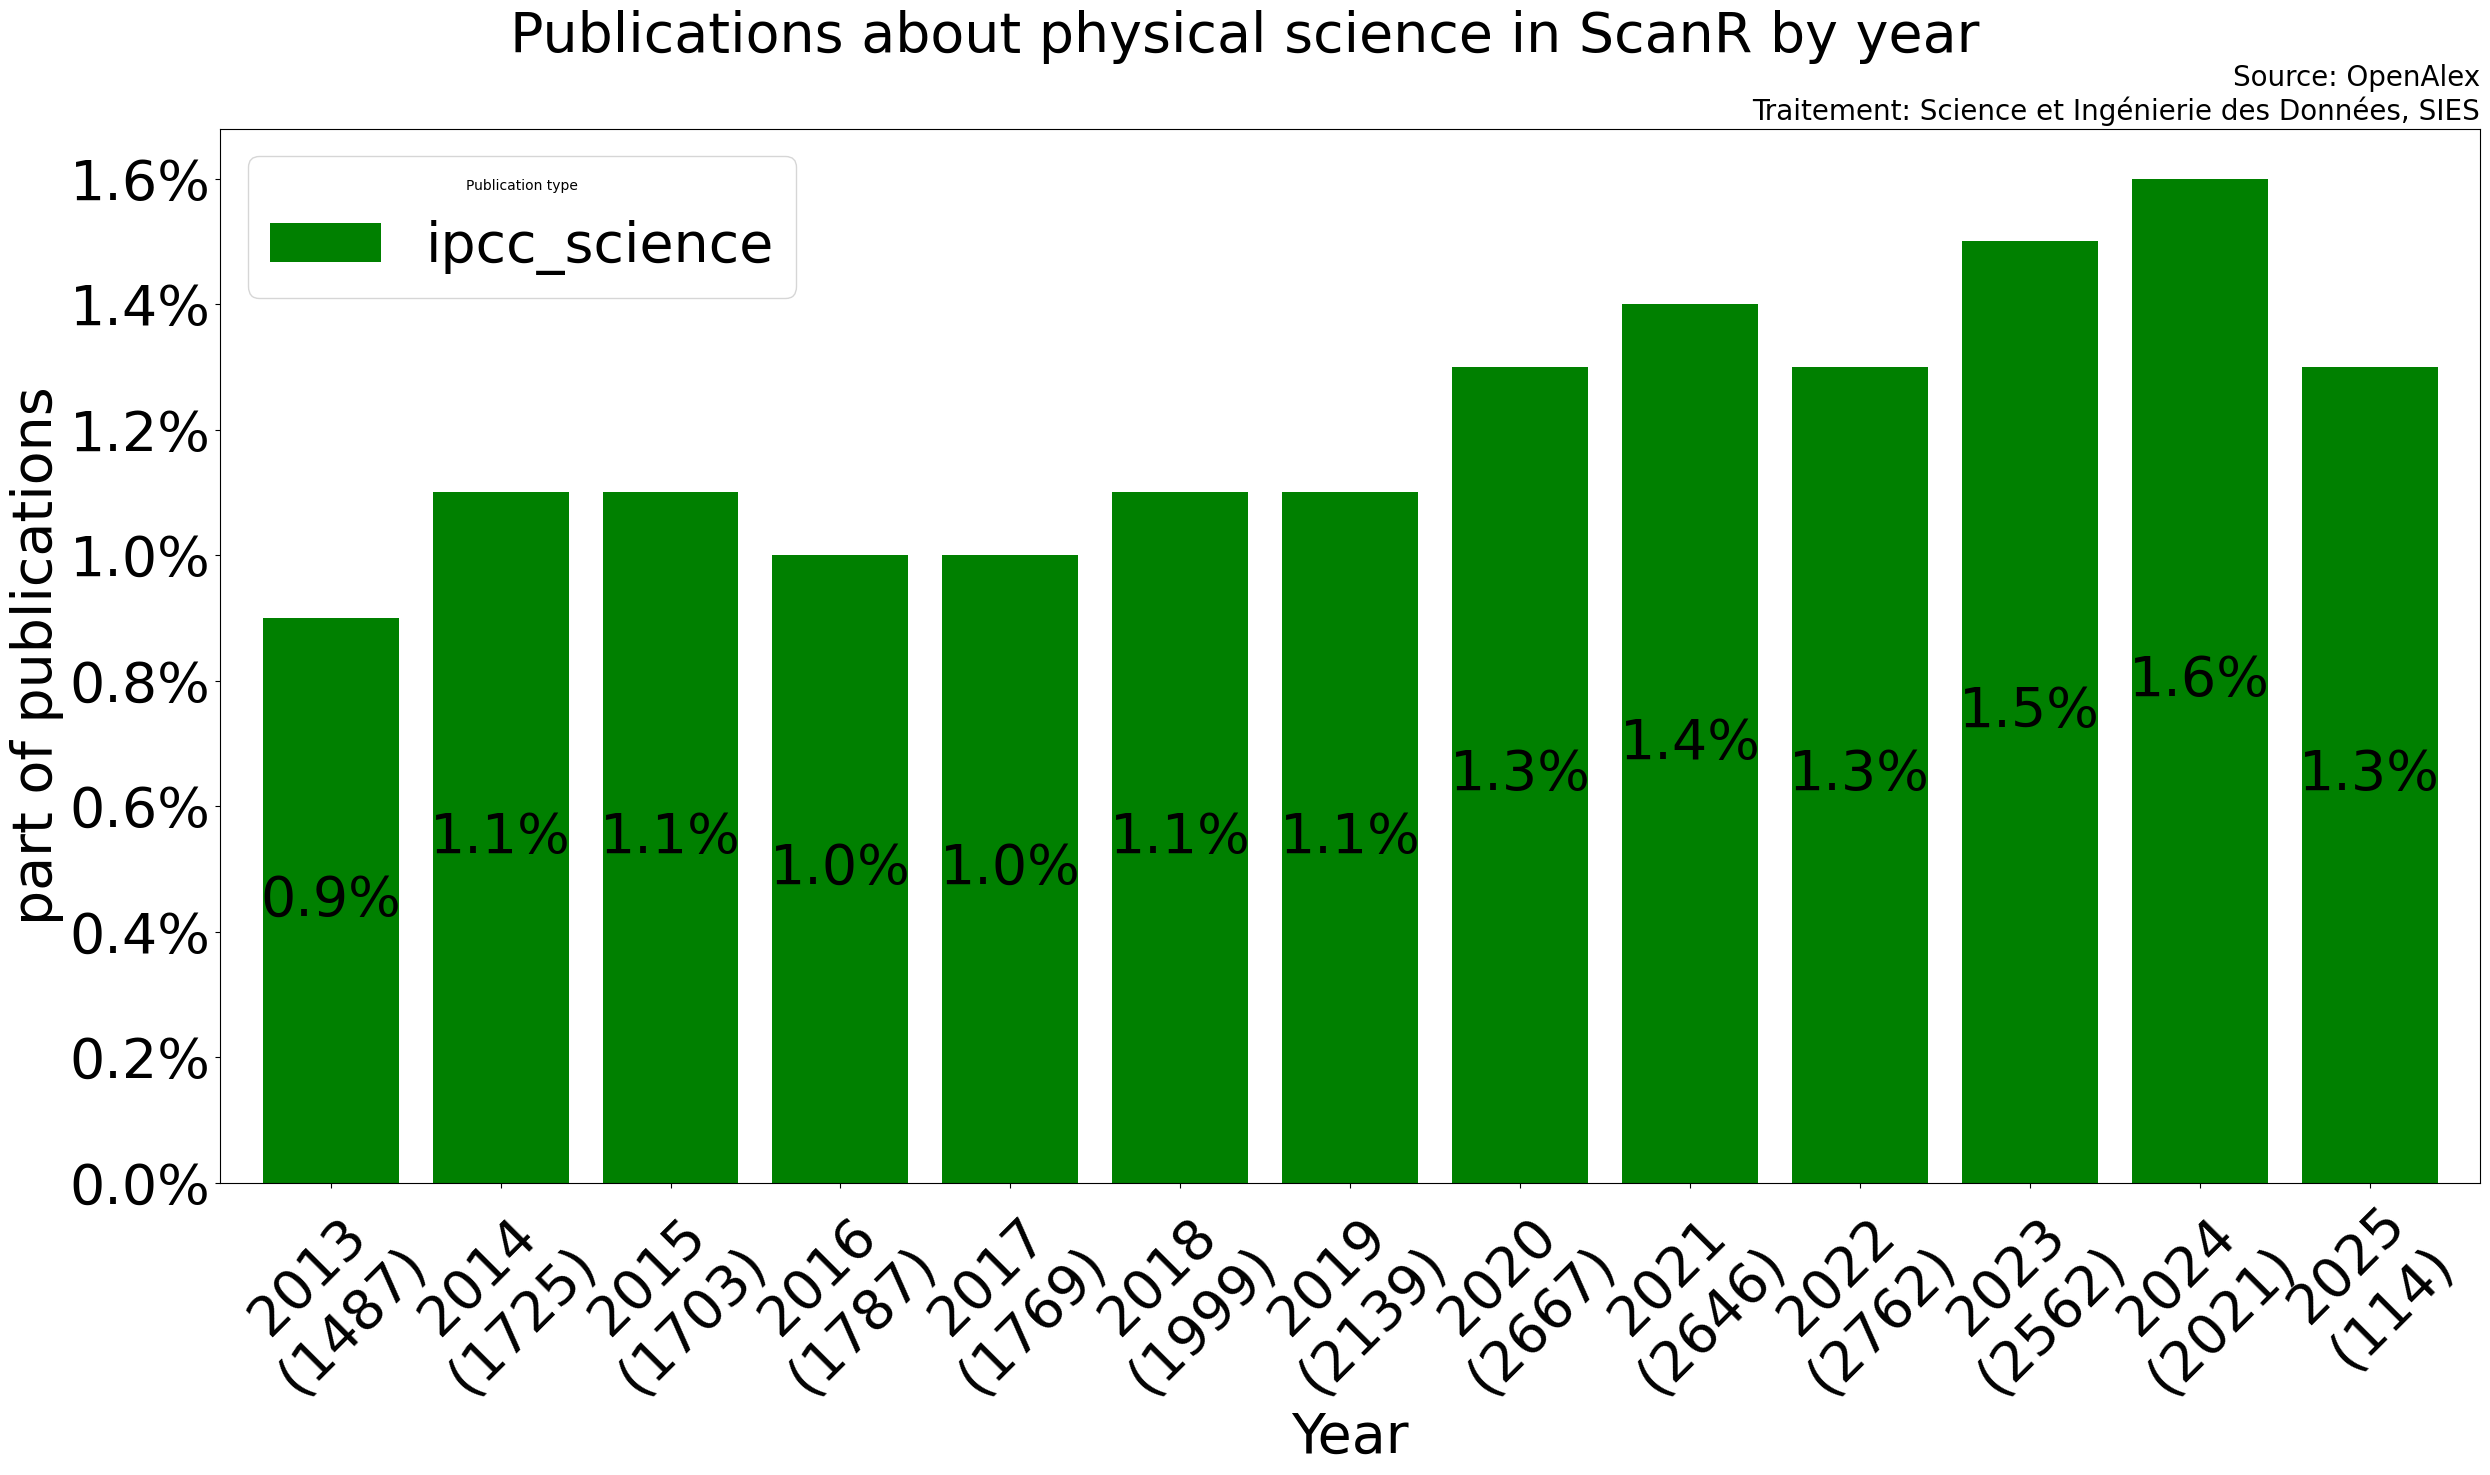

In [8]:
body = {
  "size": 0,
  "track_total_hits": True,
  "query": {
    "bool": {
      "filter": {
        "term": {
          "externalIds.type.keyword": "doi"
        }
      }
    }
  },
  "aggs": {
    "years": {
      "terms": {
        "field": "year",
        "size": 10000000
      },
      "aggs": {
        "predicted_labels": {
          "terms": {
            "field": "predict_teds.label.keyword",
            "size": 10000000
          }
        }
      }
    }
  }
}
data=get_from_es(body,'scanR2')
data_counts={}
for x in data['aggregations']['years']['buckets']:
    if x['doc_count']>=500 and x['key']>=2013:
      #data_counts[x['key']]=[]
      if 'ipcc_science' in [bucket['key'] for bucket in x['predicted_labels']['buckets']]:
          nb=[bucket['doc_count'] for bucket in x['predicted_labels']['buckets'] if bucket['key']=='ipcc_science'][0]
          data_counts[x['key']]=[round(nb*100/x['doc_count'],1),int(nb)]
      else:
          data_counts[x['key']]=[0,0]
data_counts={key: value for key, value in data_counts.items() if value!= [0]}


df = pd.DataFrame.from_dict(data_counts, orient='index', columns=['ipcc_science','nb'])
df = df.sort_index()

ax = df['ipcc_science'].plot(kind='bar', figsize=(25, 15), width=0.8, color='green')

for i, (index, row) in enumerate(df.head(20).iterrows()): 
    ax.text(i, row['ipcc_science'] / 2, f'{row["ipcc_science"]}%', ha='center', va='center', color='black', size=40)

ax.set_xlabel('Year', fontsize=40)
x_labels = [f"{index}\n({int(row['nb'])})" for index, row in df.iterrows()]
ax.set_xticklabels(x_labels, rotation=45, fontsize=40)
ax.set_ylabel(f'part of publications', fontsize=40)
ax.set_yticklabels([f'{tick:.1f}%' for tick in ax.get_yticks()], fontsize=40)

ax.legend(title='Publication type', loc='upper left', fontsize=40)

plt.suptitle("Publications about physical science in ScanR by year", size=40)
plt.title('Source: OpenAlex\nTraitement: Science et Ingénierie des Données, SIES', size=20, loc='right')

plt.tight_layout()
plt.show()

C:\Users\haallat\AppData\Local\Temp\ipykernel_7244\1067916454.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{tick:.1f}%' for tick in ax.get_yticks()], fontsize=40)


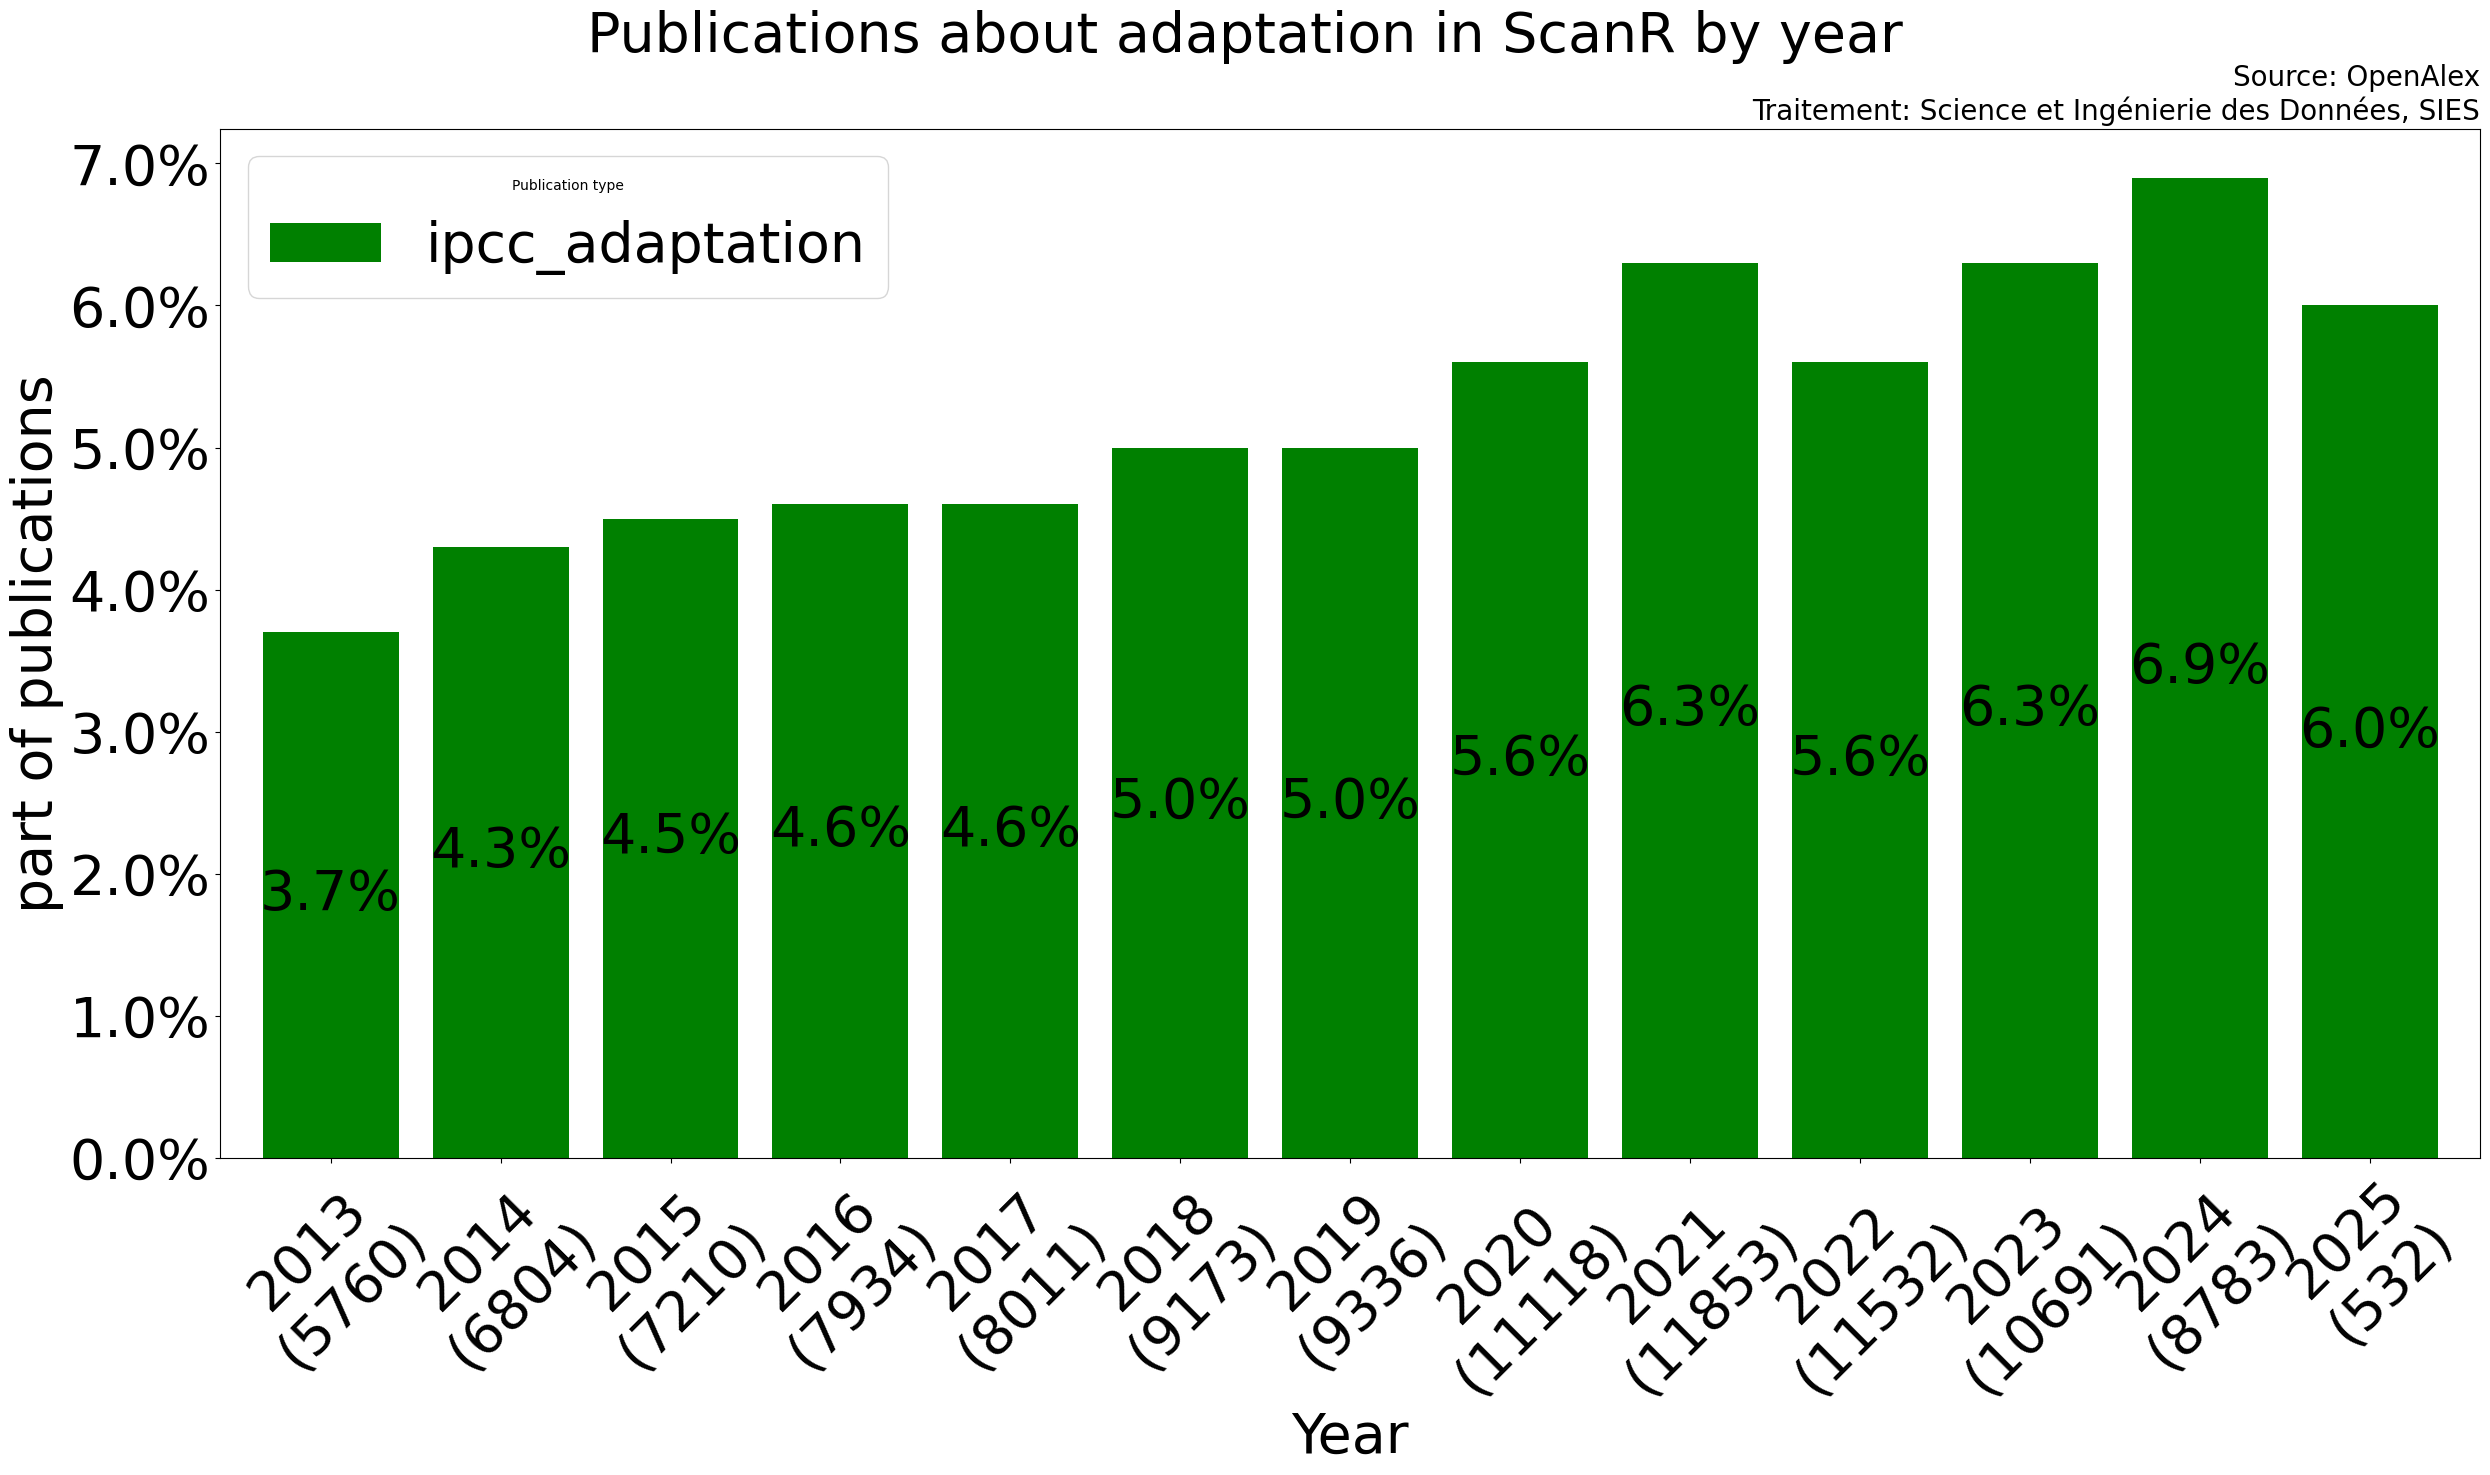

In [9]:
body = {
  "size": 0,
  "track_total_hits": True,
  "query": {
    "bool": {
      "filter": {
        "term": {
          "externalIds.type.keyword": "doi"
        }
      }
    }
  },
  "aggs": {
    "years": {
      "terms": {
        "field": "year",
        "size": 10000000
      },
      "aggs": {
        "predicted_labels": {
          "terms": {
            "field": "predict_teds.label.keyword",
            "size": 10000000
          }
        }
      }
    }
  }
}
data=get_from_es(body,'scanR2')
data_counts={}
for x in data['aggregations']['years']['buckets']:
    if x['doc_count']>=500 and x['key']>=2013:
      #data_counts[x['key']]=[]
      if 'ipcc_adaptation' in [bucket['key'] for bucket in x['predicted_labels']['buckets']]:
          nb=[bucket['doc_count'] for bucket in x['predicted_labels']['buckets'] if bucket['key']=='ipcc_adaptation'][0]
          data_counts[x['key']]=[round(nb*100/x['doc_count'],1),int(nb)]
      else:
          data_counts[x['key']]=[0,0]
data_counts={key: value for key, value in data_counts.items() if value!= [0]}


df = pd.DataFrame.from_dict(data_counts, orient='index', columns=['ipcc_adaptation','nb'])
df = df.sort_index()

ax = df['ipcc_adaptation'].plot(kind='bar', figsize=(25, 15), width=0.8, color='green')

for i, (index, row) in enumerate(df.head(20).iterrows()): 
    ax.text(i, row['ipcc_adaptation'] / 2, f'{row["ipcc_adaptation"]}%', ha='center', va='center', color='black', size=40)

ax.set_xlabel('Year', fontsize=40)
x_labels = [f"{index}\n({int(row['nb'])})" for index, row in df.iterrows()]
ax.set_xticklabels(x_labels, rotation=45, fontsize=40)
ax.set_ylabel(f'part of publications', fontsize=40)
ax.set_yticklabels([f'{tick:.1f}%' for tick in ax.get_yticks()], fontsize=40)

ax.legend(title='Publication type', loc='upper left', fontsize=40)

plt.suptitle("Publications about adaptation in ScanR by year", size=40)
plt.title('Source: OpenAlex\nTraitement: Science et Ingénierie des Données, SIES', size=20, loc='right')

plt.tight_layout()
plt.show()

C:\Users\haallat\AppData\Local\Temp\ipykernel_7244\302977174.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{tick:.1f}%' for tick in ax.get_yticks()], fontsize=40)


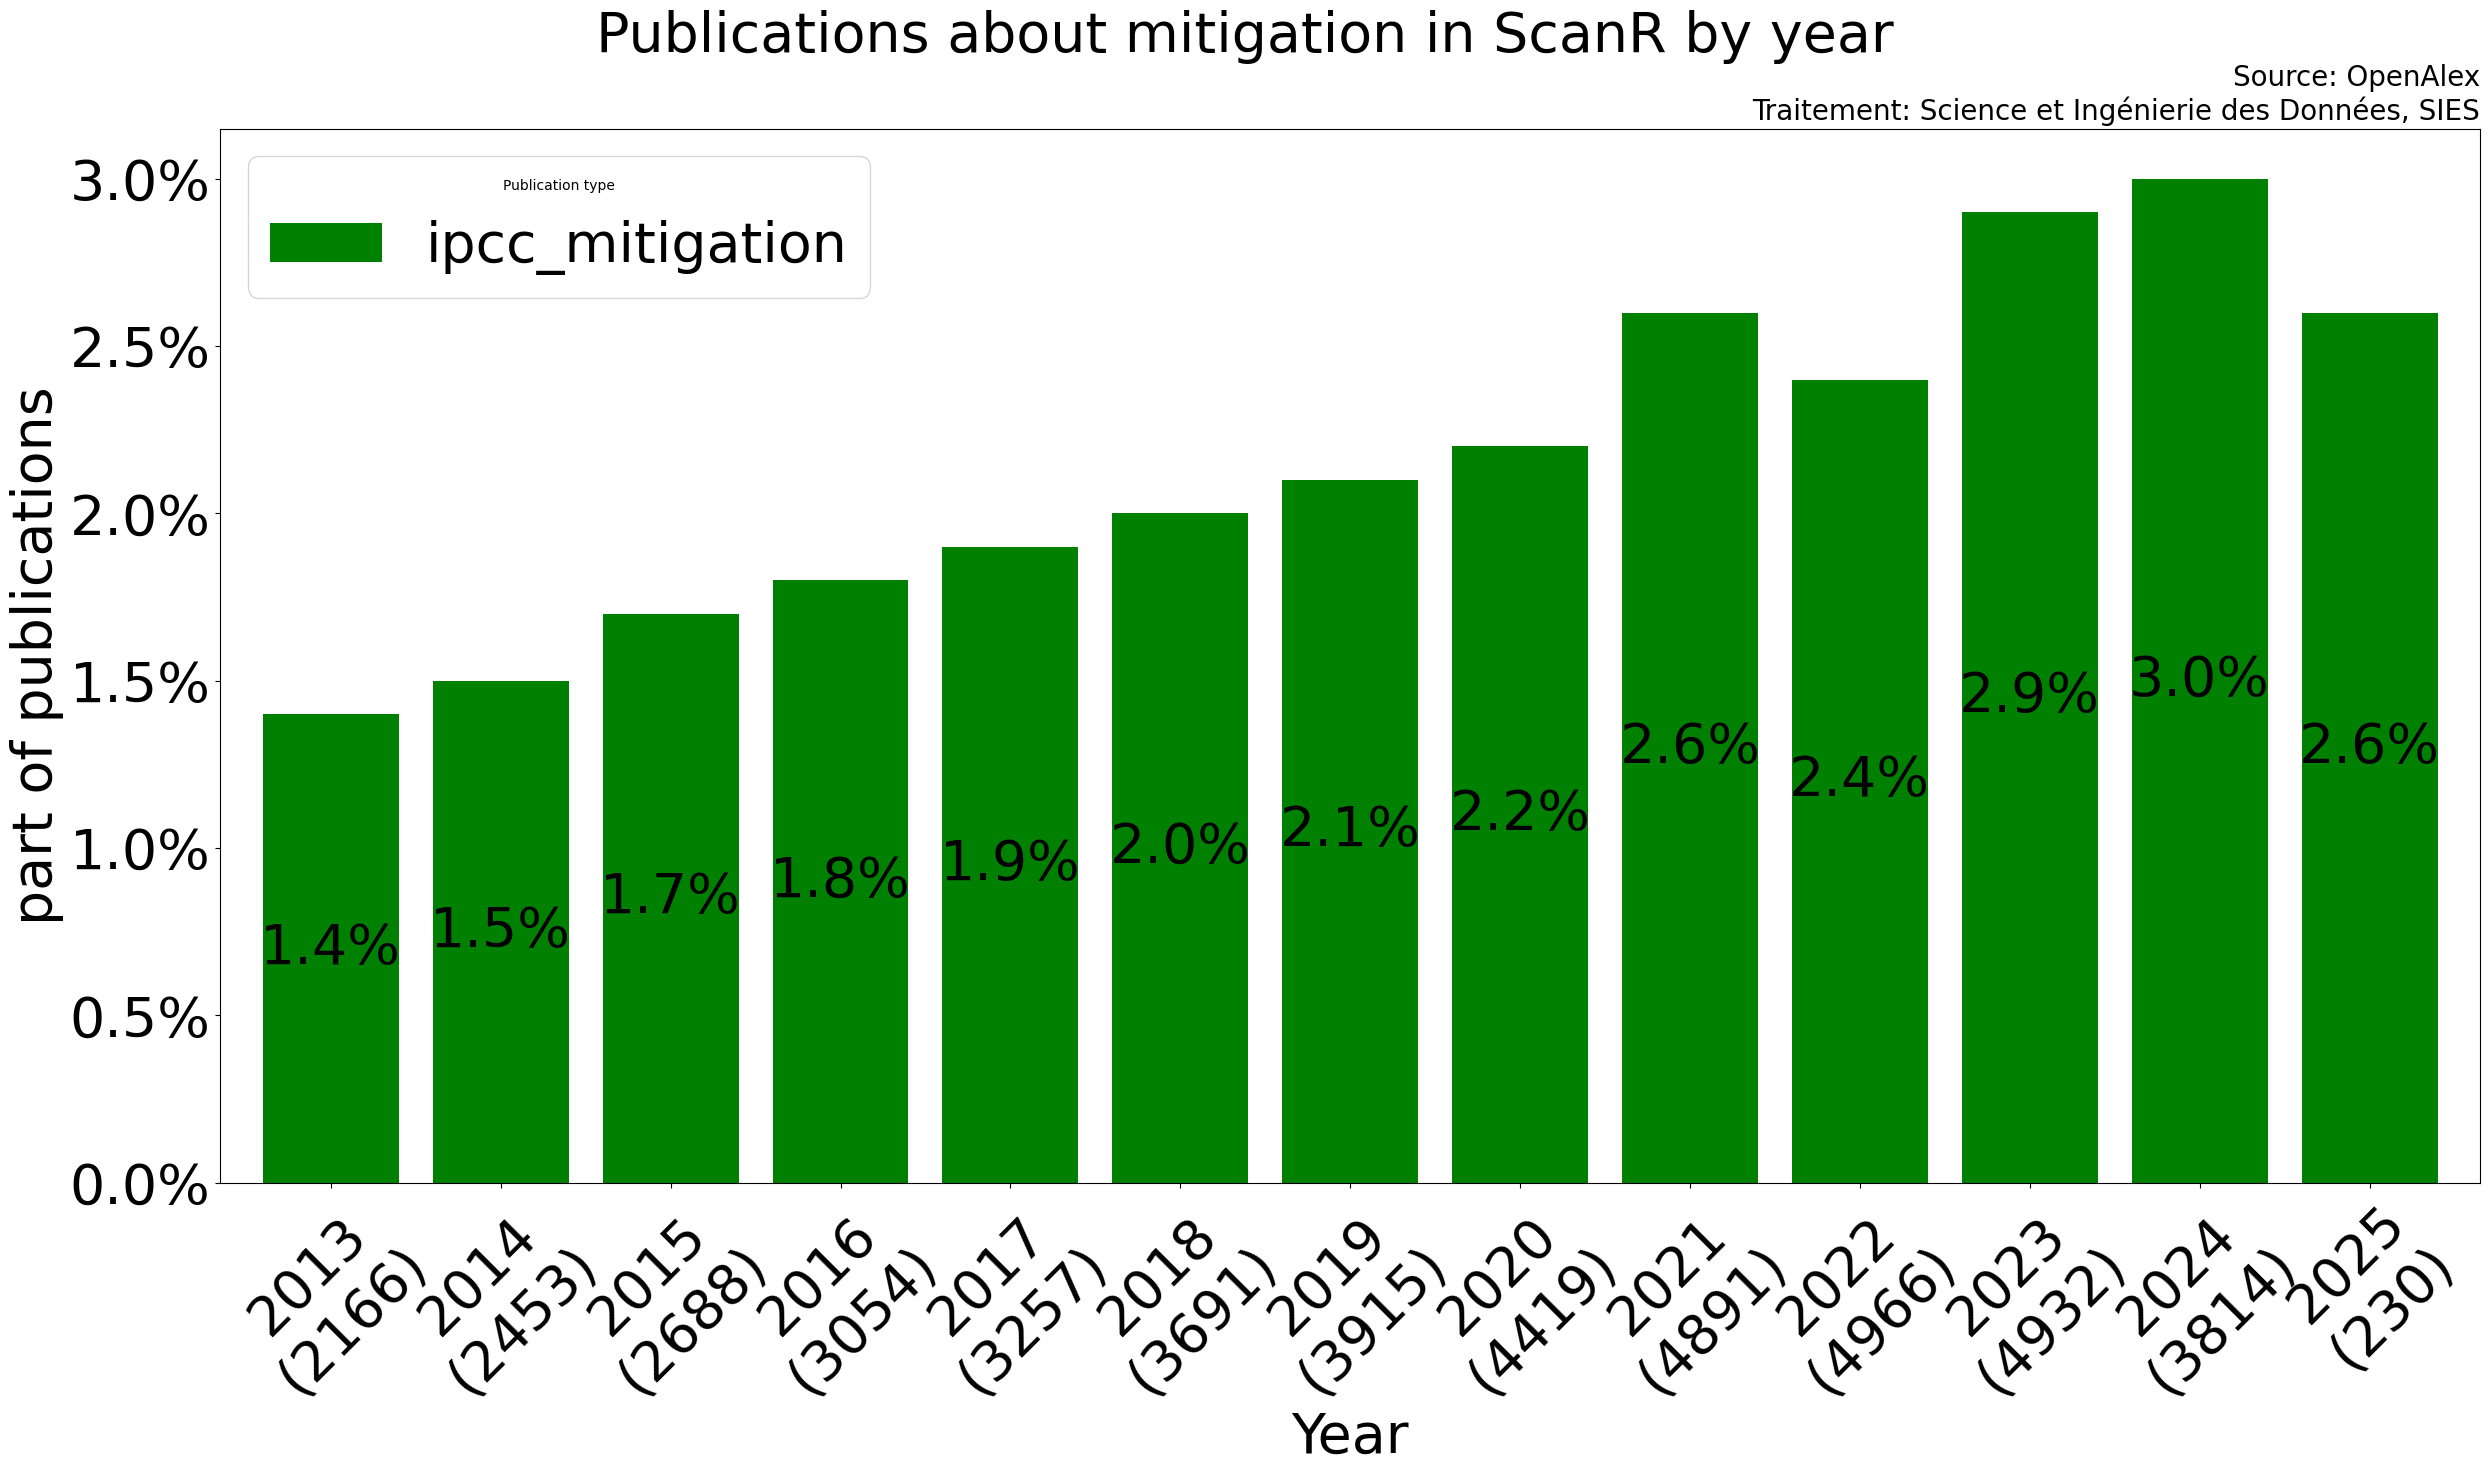

In [11]:
body = {
  "size": 0,
  "track_total_hits": True,
  "query": {
    "bool": {
      "filter": {
        "term": {
          "externalIds.type.keyword": "doi"
        }
      }
    }
  },
  "aggs": {
    "years": {
      "terms": {
        "field": "year",
        "size": 10000000
      },
      "aggs": {
        "predicted_labels": {
          "terms": {
            "field": "predict_teds.label.keyword",
            "size": 10000000
          }
        }
      }
    }
  }
}
data=get_from_es(body,'scanR2')
data_counts={}
for x in data['aggregations']['years']['buckets']:
    if x['doc_count']>=500 and x['key']>=2013:
      #data_counts[x['key']]=[]
      if 'ipcc_mitigation' in [bucket['key'] for bucket in x['predicted_labels']['buckets']]:
          nb=[bucket['doc_count'] for bucket in x['predicted_labels']['buckets'] if bucket['key']=='ipcc_mitigation'][0]
          data_counts[x['key']]=[round(nb*100/x['doc_count'],1),int(nb)]
      else:
          data_counts[x['key']]=[0,0]
data_counts={key: value for key, value in data_counts.items() if value!= [0]}


df = pd.DataFrame.from_dict(data_counts, orient='index', columns=['ipcc_mitigation','nb'])
df = df.sort_index()

ax = df['ipcc_mitigation'].plot(kind='bar', figsize=(25, 15), width=0.8, color='green')

for i, (index, row) in enumerate(df.head(20).iterrows()): 
    ax.text(i, row['ipcc_mitigation'] / 2, f'{row["ipcc_mitigation"]}%', ha='center', va='center', color='black', size=40)

ax.set_xlabel('Year', fontsize=40)
x_labels = [f"{index}\n({int(row['nb'])})" for index, row in df.iterrows()]
ax.set_xticklabels(x_labels, rotation=45, fontsize=40)
ax.set_ylabel(f'part of publications', fontsize=40)
ax.set_yticklabels([f'{tick:.1f}%' for tick in ax.get_yticks()], fontsize=40)

ax.legend(title='Publication type', loc='upper left', fontsize=40)

plt.suptitle("Publications about mitigation in ScanR by year", size=40)
plt.title('Source: OpenAlex\nTraitement: Science et Ingénierie des Données, SIES', size=20, loc='right')

plt.tight_layout()
plt.show()

top topics ipcc

In [ ]:
body = {
  "size": 0,
  "track_total_hits": True,
  "query": {
    "exists": {
      "field": "topics"
    }
  },
  "aggs": {
    "predicted_labels": {
      "terms": {
        "field": "predict_teds.label.keyword",
        "size": 10000000
      },
      "aggs": {
        "topics": {
          "terms": {
            "field": "primary_topic.id.keyword",  #topics.display_name.keyword
            "size": 10000
          }
        }
      }
    }
  }
}
data=get_from_es(body,'scanR2')

In [14]:
data

{'took': 2,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 0, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'predicted_labels': {'doc_count_error_upper_bound': 0,
   'sum_other_doc_count': 0,
   'buckets': []}}}

In [11]:
names=[x['key'] for x in data['aggregations']['predicted_labels']['buckets'][1]['topics']['buckets']]

In [9]:
ids=[x['key'] for x in data['aggregations']['predicted_labels']['buckets'][1]['topics']['buckets']]

In [12]:
df=pd.DataFrame(list(zip(ids,names)),columns=['id','name'])
df

,id,name


In [29]:
df.loc[:,'id']=df.loc[:,'id'].apply(lambda x: str(x).replace('https://openalex.org/',''))

In [30]:
dict_topics=dict(zip(list(df.id),list(df.name)))

In [36]:
list(dict_topics.keys())

['T11475',
 'T10153',
 'T13099',
 'T14186',
 'T13641',
 'T12119',
 'T13379',
 'T13033',
 'T14162',
 'T11132',
 'T13807',
 'T10325',
 'T10039',
 'T13888',
 'T13152',
 'T14149',
 'T10001',
 'T12909',
 'T10477',
 'T13396',
 'T10048',
 'T10299',
 'T13695',
 'T10110',
 'T10413',
 'T10026',
 'T12454',
 'T10472',
 'T14402',
 'T13070',
 'T10360',
 'T11020',
 'T10158',
 'T10406',
 'T12100',
 'T10804',
 'T13156',
 'T10988',
 'T10581',
 'T10095',
 'T10351',
 'T10002',
 'T12917',
 'T10192',
 'T11287',
 'T10181',
 'T14379',
 'T10521',
 'T10224',
 'T13068',
 'T10185',
 'T11157',
 'T10165',
 'T10215',
 'T10417',
 'T10015',
 'T13534',
 'T10077',
 'T14199',
 'T10522',
 'T11482',
 'T10251',
 'T11949',
 'T10527',
 'T13372',
 'T10285',
 'T10017',
 'T11930',
 'T10207',
 'T11323',
 'T10322',
 'T10818',
 'T10580',
 'T10378',
 'T10172',
 'T10037',
 'T10231',
 'T10269',
 'T10876',
 'T11177',
 'T10142',
 'T10382',
 'T10645',
 'T10041',
 'T11016',
 'T10604',
 'T10241',
 'T14021',
 'T10025',
 'T11491',
 'T10159',

In [13]:
climat_topics=['T10753', 'T11988', 'T10122', 'T10139', 'T10577', 'T11862', 'T13377', 'T10898', 'T12981', 'T10174', 'T11405', 'T13396', 'T12213', 'T12639', 'T11056', 'T11880', 'T11753', 'T10439', 'T10766', 'T10438', 'T12806', 'T11244', 'T11186', 'T10029', 'T11588', 'T10075', 'T10017', 'T10644', 'T10895', 'T10266', 'T10230', 'T11320', 'T10341', 'T10005', 'T10347', 'T10765', 'T10032', 'T11333', 'T10226', 'T10466', 'T10647', 'T11483', 'T10330', 'T10471', 'T10199', 'T10555', 'T11259', 'T11594', 'T10643', 'T10319', 'T10487', 'T10435', 'T10659', 'T10089']

In [34]:
dict_topics['T11056']

'Physiological and biochemical adaptations'

In [11]:
df.loc[20:40,:]

,id,name
20,T10048,Particle physics theoretical and experimental ...
21,T10299,Photonic and Optical Devices
22,T13695,"Aging, Elder Care, and Social Issues"
23,T10110,earthquake and tectonic studies
24,T10413,High-pressure geophysics and materials
25,T10026,"Galaxies: Formation, Evolution, Phenomena"
26,T12454,European Political History Analysis
27,T10472,Semiconductor materials and devices
28,T14402,Political and Social Issues
29,T13070,Cultural Identity and Heritage
